Analysing Coco-cola Stock 


STEP 1

In [1]:
#importing Python libraries 


In [2]:
import pandas as p 
import numpy as n 
import seaborn as s 
import matplotlib.pyplot as m

STEP 2 DATA lOADING


In [4]:
#1 data loading
cola = p.read_csv(r"C:\Users\Aayush\Downloads\Coca-Cola_stock_history.csv")
cola.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1962-01-02,0.050016,0.051378,0.050016,0.050016,806400,0.0,0
1,1962-01-03,0.049273,0.049273,0.048159,0.048902,1574400,0.0,0
2,1962-01-04,0.049026,0.049645,0.049026,0.049273,844800,0.0,0
3,1962-01-05,0.049273,0.049892,0.048035,0.048159,1420800,0.0,0
4,1962-01-08,0.047787,0.047787,0.046735,0.047664,2035200,0.0,0


STEP 3 DATA CLEANING

In [55]:
#2 data cleaning and checking any null value 

cola.isnull().sum()
cola.dropna(inplace=True)




Date             0
Open             0
High             0
Low              0
Close            0
Volume           0
Dividends        0
Stock Splits     0
MA_20            0
MA_50            0
Daily_Return     0
Volatility_20    0
dtype: int64

STEP 4 FEATURE ENGINEERING

In [19]:
#491) Moving average 

cola['MA_20'] = cola['Close'].rolling(window=20).mean() #for 20-days moving average
cola['MA_50'] = cola['Close'].rolling(window=50).mean() #for 50-days moving average


In [14]:
#4(2) Daily Returns 

cola['Daily_Return'] = cola['Close'].pct_change()

In [17]:
#4(3) volatility

cola['Volatility_20'] = cola['Daily_Return'].rolling(window=20).std()


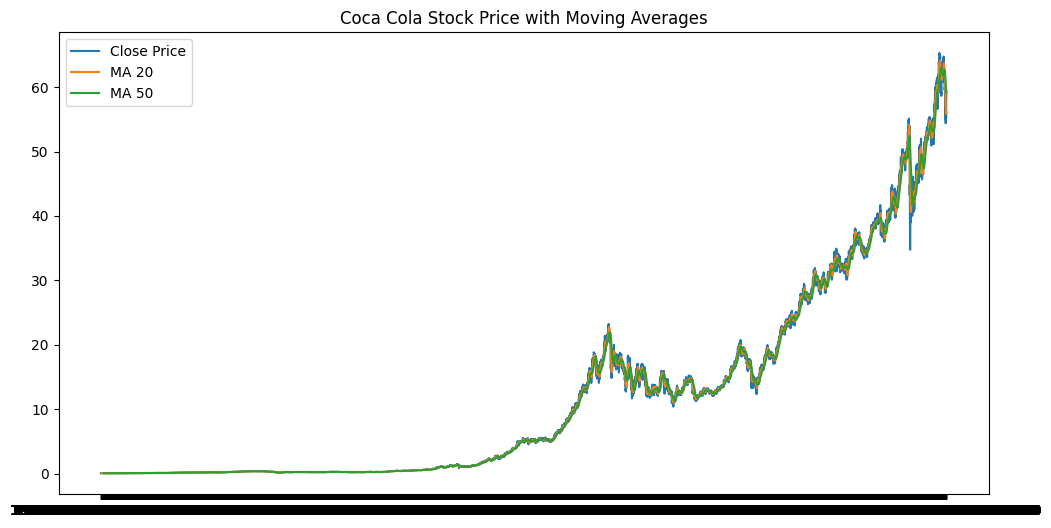

In [22]:
#4(4) Quick visual 
m.figure(figsize=(12,6))
m.plot(cola['Date'], cola['Close'], label='Close Price')
m.plot(cola['Date'], cola['MA_20'], label='MA 20')
m.plot(cola['Date'], cola['MA_50'], label='MA 50')
m.legend()
m.title("Coca Cola Stock Price with Moving Averages")
m.show()


STEP 5 Data visualization/EDA 

In [56]:
#5(1) data describe-  
print(cola.describe())

               Open          High           Low         Close        Volume  \
count  15262.000000  15262.000000  15262.000000  15262.000000  1.526200e+04   
mean      11.850660     11.944785     11.754847     11.853194  9.164087e+06   
std       15.035006     15.142659     14.924814     15.035590  7.957132e+06   
min        0.037154      0.037279      0.034890      0.037028  7.680000e+04   
25%        0.239461      0.241549      0.237297      0.239432  2.947200e+06   
50%        4.959658      5.012348      4.918166      4.959969  7.732300e+06   
75%       17.425250     17.663839     17.230594     17.456363  1.309292e+07   
max       66.037933     66.235058     64.776308     65.259270  1.241690e+08   

          Dividends  Stock Splits         MA_20         MA_50  Daily_Return  \
count  15262.000000  15262.000000  15262.000000  15262.000000  15262.000000   
mean       0.001683      0.001114     11.818108     11.760960      0.000576   
std        0.021336      0.049226     14.991442    

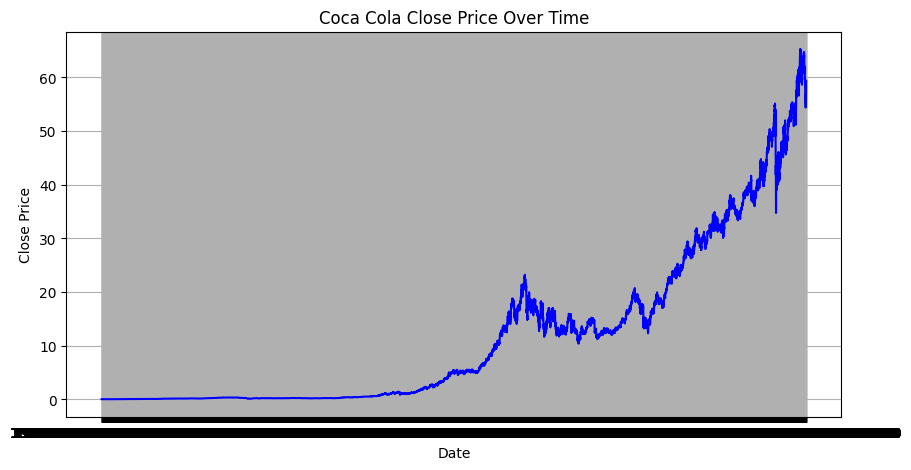

In [24]:
#5(2) Data Visualization

# 1. Line Chart – Close Price over Time
m.figure(figsize=(10, 5))
m.plot(cola['Date'], cola['Close'], color='blue')
m.title("Coca Cola Close Price Over Time")
m.xlabel("Date")
m.ylabel("Close Price")
m.grid(True)
m.show()


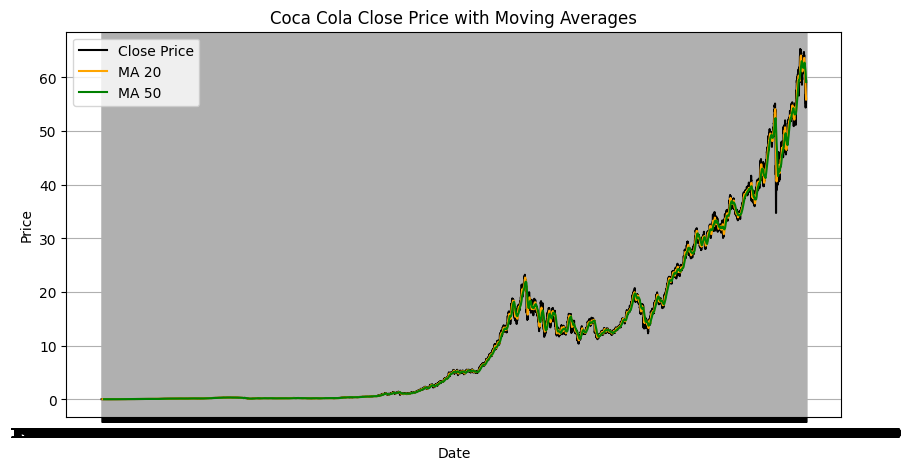

In [25]:
# 2 Close Price + Moving Averages (MA20 & MA50)

m.figure(figsize=(10, 5))
m.plot(cola['Date'], cola['Close'], label='Close Price', color='black')
m.plot(cola['Date'], cola['MA_20'], label='MA 20', color='orange')
m.plot(cola['Date'], cola['MA_50'], label='MA 50', color='green')
m.title("Coca Cola Close Price with Moving Averages")
m.xlabel("Date")
m.ylabel("Price")
m.legend()
m.grid(True)
m.show()


C:\Users\Aayush\AppData\Local\Temp\ipykernel_17712\57249231.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  m.legend()


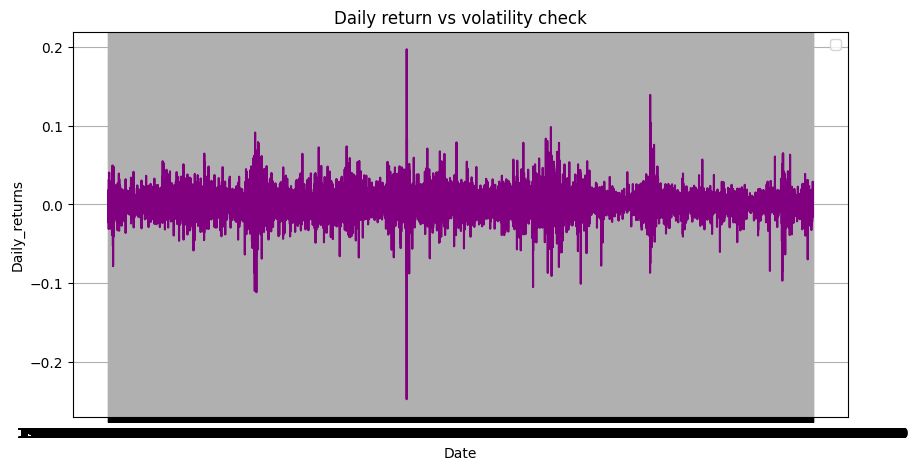

In [27]:
#3 Daily Return – Volatility Check

m.figure(figsize=(10,5))
m.plot(cola['Date'],cola['Daily_Return'],color='purple')
m.title("Daily return vs volatility check")
m.xlabel("Date")
m.ylabel("Daily_returns")
m.legend()
m.grid(True)
m.show()

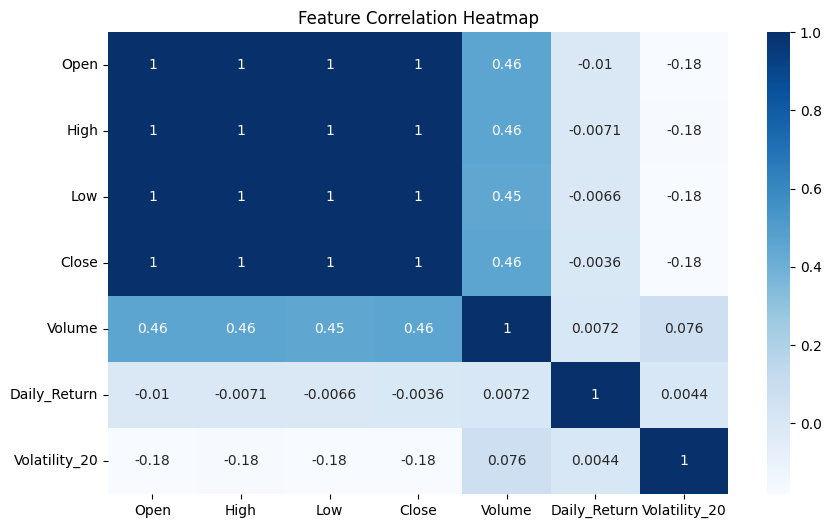

In [30]:
#4  correlation heatmap
m.figure(figsize=(10,6))
s.heatmap(cola[['Open', 'High', 'Low', 'Close', 'Volume', 'Daily_Return', 'Volatility_20']].corr(), annot=True, cmap='Blues')
m.title("Feature Correlation Heatmap")
m.show()


STEP 6 :  Model Building 

In [62]:
!pip install scikit-learn



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
#6 imorting sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [37]:
#6(1).Feature Selection
#Use engineered features to predict Close

features = ['Open', 'High', 'Low', 'Volume', 'Dividends',
 'Stock Splits', 'MA_20', 'MA_50', 'Daily_Return']
X = cola[features]
y = cola['Close']


In [42]:
#6(3) Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42, shuffle=False)

In [65]:
import yfinance as yf


In [64]:
!pip install yfinance



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


 Step 8: Live Prediction System

In [63]:
!pip install streamlit



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
# Fetch Latest 10 Days Data (Coca Cola stock)

ticker = 'KO'  # Coca Cola
latest_data = yf.download(ticker, period="10d")
latest_data.reset_index(inplace=True)
latest_data.tail()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,KO,KO,KO,KO,KO
5,2025-04-09,69.949997,70.470001,67.279999,67.919998,27918700
6,2025-04-10,70.760002,71.209999,68.980003,70.190002,22450200
7,2025-04-11,71.430000,71.849998,70.540001,70.910004,19988200
8,2025-04-14,72.449997,72.660004,70.930000,71.300003,13930200
9,2025-04-15,71.860001,72.629997,71.720001,72.620003,14964000


In [47]:
#  Feature Engineering on Latest Data

latest_data['MA_20'] = latest_data['Close'].rolling(window=20).mean()
latest_data['MA_50'] = latest_data['Close'].rolling(window=50).mean()
latest_data['Prev_Close'] = latest_data['Close'].shift(1)
latest_data.dropna(inplace=True)
